In [297]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import linalg
import circle_fit as cf

In [298]:
N = 100
half_n = N//2
r = 10
s = r/16
t = np.random.uniform(0, 2*np.pi, half_n)
n = s*np.random.randn(half_n)
x, y = (r+n)*np.cos(t), (r+n)*np.sin(t)
X_circle = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

m, b = -1, 2
x = np.linspace(-12, 12, half_n)
y = m*x + b + s*np.random.randn(half_n)
X_line = np.hstack((x.reshape(half_n, 1), y.reshape(half_n, 1)))

In [299]:
def RANSAC_Circle(data_points):
    thres = np.std(data_points)/16  # threshold for RANSAC
    num_iterations = np.log(1 - 0.95)/np.log(1 - (1 - 0.5)**3)  
    iterations_done, max_inlier_count, best_model = 0, 0, None

    while iterations_done < num_iterations:
        iterations_done += 1
        np.random.shuffle(data_points)  # randomly selecting 3 data points
        sample_data = data_points[:3]
        xc,yc,radius,_ = cf.least_squares_circle((sample_data)) # estimating a circle with selected data points
        center = (xc, yc)
        error = np.abs(radius - np.sqrt(np.sum((center - data_points[3:])**2, axis=1))) # computing error of remaining data points
        inliers = error <= thres # camparing the error with threshold
        inlier_count = np.count_nonzero(inliers) # number of inliers
        if inlier_count > max_inlier_count: # selecting the best model
            max_inlier_count = inlier_count
            inlier_points = []
            for index, inlier in enumerate(inliers): # filtering the inlier points
                if inlier == True:
                    inlier_points.append(data_points[3:][index])
            inlier_points = np.array(inlier_points)
            best_model = (center, radius, data_points[:3], inlier_points)

    return best_model 

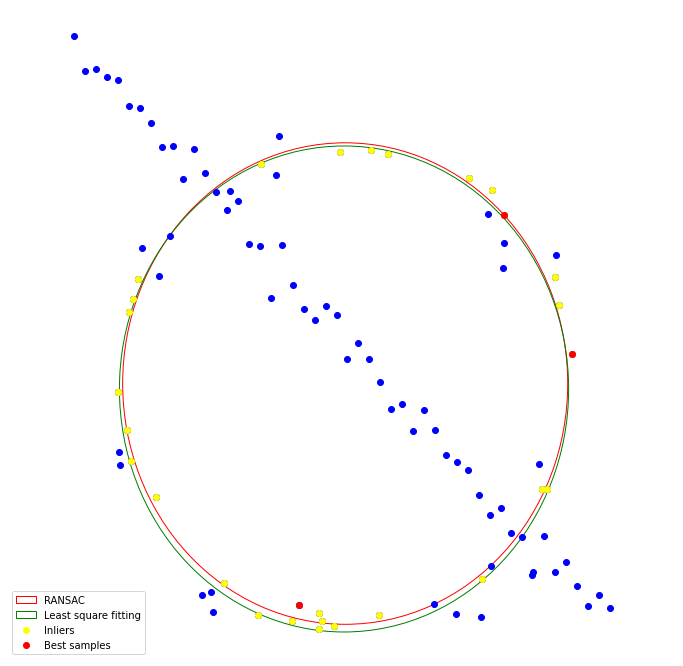

In [303]:
best_model = RANSAC_Circle(X_circle)
xc,yc,r,_ = cf.least_squares_circle((X_circle))

figure, ax = plt.subplots(figsize=(12, 12))
RASNSAC_circle = plt.Circle(best_model[0], best_model[1], fill=False, color='red', label='RANSAC')        
ax.add_artist(RASNSAC_circle)
circle = plt.Circle((xc, yc), r, fill=False, color='green', label='Least square fitting')    
ax.add_artist(circle)
ax.scatter(X_circle[:, 0], X_circle[:, 1], c='blue')
ax.scatter(X_line[:, 0], X_line[:, 1], c='blue')
ax.scatter(best_model[3][:, 0], best_model[3][:, 1], c='yellow', label='Inliers')
ax.scatter(best_model[2][:, 0], best_model[2][:, 1], c='red', label='Best samples')
plt.legend(loc=3)
plt.xlim(-15, 15)
plt.axis('off')
plt.savefig(r"Report\Images\1.png")
plt.show()